## Assumptions of Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Administrator/Downloads/housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


### 1. Linear Relationship
There exists a linear relationship between the independent variable, x, and the dependent variable, y.

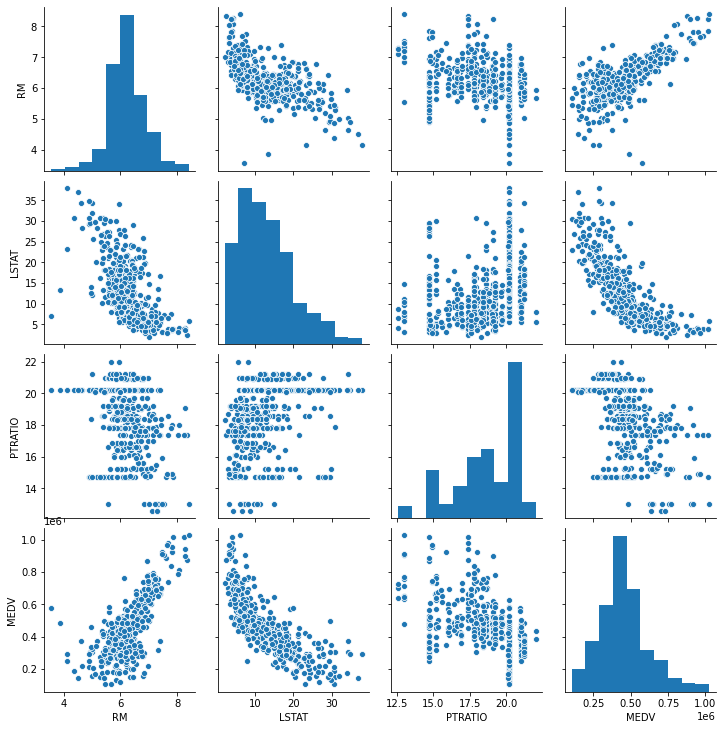

In [3]:
sns.pairplot(data=df)

For example, the points in the plot below look like they fall on roughly a straight line, which indicates that there is a linear relationship between RM and MEDV:

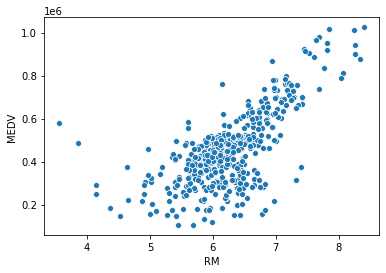

In [4]:
sns.scatterplot(x="RM",y="MEDV",data=df)

And in this plot there appears to be a clear relationship between LSTAT and MEDV, but not a linear relationship:

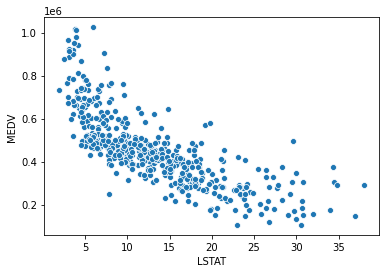

In [5]:
sns.scatterplot(x="LSTAT",y="MEDV",data=df)

However, there doesn’t appear to be a linear relationship between PTRATIO and MEDV in the plot below:

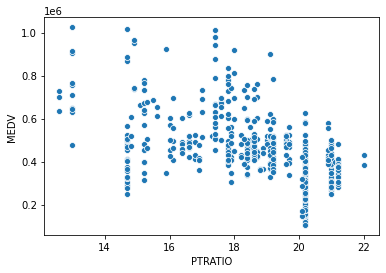

In [6]:
sns.scatterplot(x="PTRATIO",y="MEDV",data=df)

#### Methods make use when there is no linear Relation

1. Apply some non linear transformation  -> log ,square root
2. To add another independant var , x=> x^2 

In [7]:
x=df.drop(columns="MEDV")
y=df["MEDV"]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtrain)
residuals=ytrain.values-ypred

### 2.Homoscedasticity 
Residuals should have the constant variance at every level of x
This is known as homoscedasticity.  When this is not the case, the residuals are said to suffer from heteroscedasticity.

plot the fitted values vs residuals
#### How to determine if this assumption is met

The simplest way to detect heteroscedasticity is by creating a fitted value vs. residual plot. 

Once you fit a regression line to a set of data, you can then create a scatterplot that shows the fitted values of the model vs. the residuals of those fitted values. The scatterplot below shows a typical fitted value vs. residual plot in which heteroscedasticity is present.

Text(0, 0.5, 'Residuals')

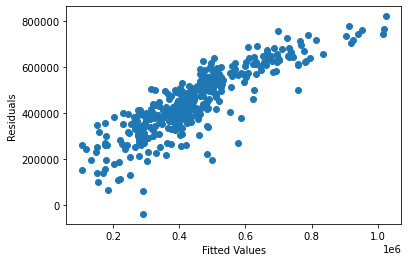

In [8]:
plt.scatter(ytrain.values,ypred)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

There are three common ways to fix heteroscedasticity:

1. Transform the dependent variable.

2. Redefine the dependent variable.  

3. Use weighted regression. 

### 3. Normality of Residuals

(array([ 10.,  37.,  90., 111.,  78.,  32.,  17.,   8.,   5.,   3.]),
 array([-193379.54520956, -141056.72112358,  -88733.89703759,
         -36411.07295161,   15911.75113437,   68234.57522035,
         120557.39930633,  172880.22339231,  225203.0474783 ,
         277525.87156428,  329848.69565026]),
 <a list of 10 Patch objects>)

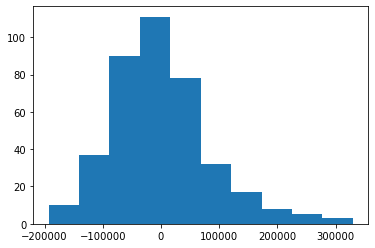

In [19]:
plt.hist(residuals)

f the normality assumption is violated, you have a few options:

    First, verify that any outliers aren’t having a huge impact on the distribution. If there are outliers present, make sure that they are real values and that they aren’t data entry errors.
    Next, you can apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.


### 4. Mean of Residuals
 Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [10]:
print("Mean of Residual is :", np.mean(residuals))

Mean of Residual is : 6.453458057797474e-11


### 5.No Autocorrelation
 When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

There should not be autocorrelation in the data so the error terms should not form any pattern.

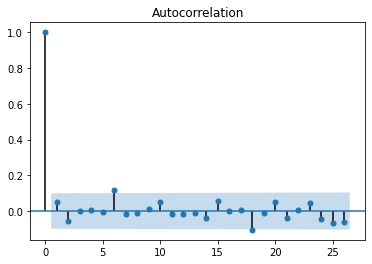

In [11]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals)
plt.show()

### 6. No Perfect Multicolinearity 
In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

In [12]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


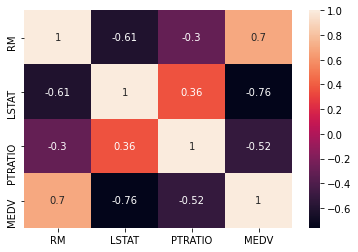

In [13]:
sns.heatmap(df.corr(),annot=True)

### Remove Multicolinearity using VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d

In [17]:
get_vif(df)

{'RM': 118.38808961936905,
 'LSTAT': 8.209014631871812,
 'PTRATIO': 64.57550325995534,
 'MEDV': 28.218939396203833}

vif =1 -> no correlation<br>
vif if exceeds 5 and 10 -> high multicolinearity 

In [18]:
new_df=df.drop(columns=["PTRATIO"])
get_vif(new_df)

{'RM': 44.91197666603433,
 'LSTAT': 7.023142747041569,
 'MEDV': 25.520959536322515}